# STOCK MARKET PREDICTION

## Objective: Determine highest price and lowest price in the trading      based on the opening price.


In [1]:
import numpy as np
import pandas as pd
df2 = pd.read_csv('NSE-TATAGLOBAL.csv')

In [2]:
df2.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df2.tail(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [51]:
#Check for duplicates in "Date"
column_to_check = 'Date'
duplicates = df2[df2.duplicated(subset=[column_to_check], keep=False)]
num_duplicates = duplicates.shape[0]

print(f"Duplicate values in column '{column_to_check}':")
print(duplicates)
print(f"\nNumber of duplicates in column '{column_to_check}': {num_duplicates}")


Duplicate values in column 'Date':
Empty DataFrame
Columns: [Date, Open, High, Low, Last, Close, Total Trade Quantity, Turnover (Lacs)]
Index: []

Number of duplicates in column 'Date': 0


Given the the information and duplicates of the data frame. THere is no null values and duplicated dates.

In [52]:
# Correlates among the attributes.
correlation_matrix = df2[['Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity', 'Turnover (Lacs)']].corr()
print(correlation_matrix)


                          Open      High       Low      Last     Close  \
Open                  1.000000  0.999015  0.998825  0.997781  0.997840   
High                  0.999015  1.000000  0.998773  0.999155  0.999194   
Low                   0.998825  0.998773  1.000000  0.999051  0.999119   
Last                  0.997781  0.999155  0.999051  1.000000  0.999961   
Close                 0.997840  0.999194  0.999119  0.999961  1.000000   
Total Trade Quantity  0.385951  0.406405  0.380621  0.399328  0.398911   
Turnover (Lacs)       0.612877  0.630589  0.608502  0.624584  0.624213   

                      Total Trade Quantity  Turnover (Lacs)  
Open                              0.385951         0.612877  
High                              0.406405         0.630589  
Low                               0.380621         0.608502  
Last                              0.399328         0.624584  
Close                             0.398911         0.624213  
Total Trade Quantity              1

In [14]:
#Sorting attributre correlated with "Open"
open_correlations = correlation_matrix['Open'].sort_values(ascending=False)

print(open_correlations)


Open                    1.000000
High                    0.999015
Low                     0.998825
Close                   0.997840
Last                    0.997781
Turnover (Lacs)         0.612877
Total Trade Quantity    0.385951
Name: Open, dtype: float64


C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


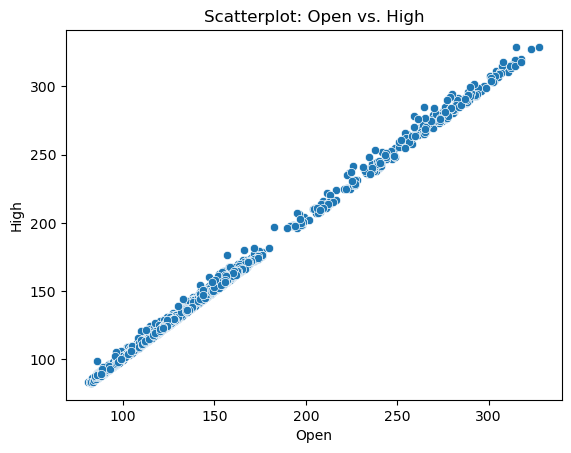

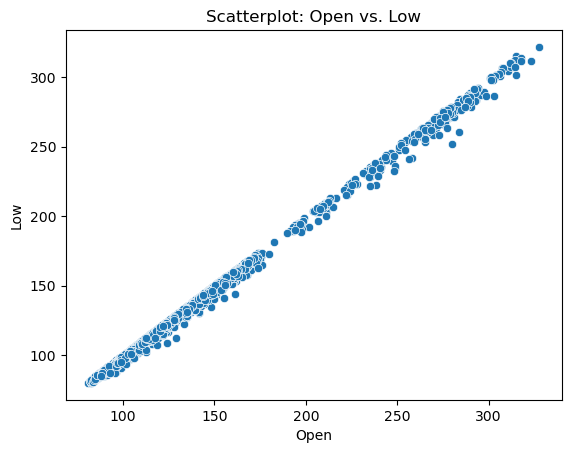

In [15]:
#Scatterplot of "Open" with "High" and "Low"
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot for 'Open' vs. 'High'
sns.scatterplot(data=df2, x='Open', y='High')
plt.title('Scatterplot: Open vs. High')
plt.show()

#Scatterplot for 'Open' vs. 'Low'
sns.scatterplot(data=df2, x='Open', y='Low')
plt.title('Scatterplot: Open vs. Low')
plt.show()


<Figure size 1200x600 with 0 Axes>

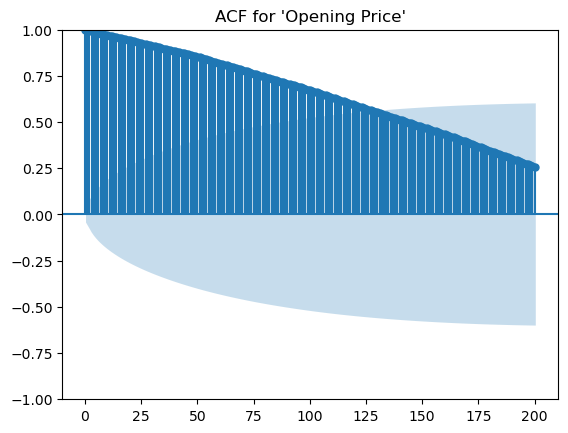

<Figure size 1200x600 with 0 Axes>

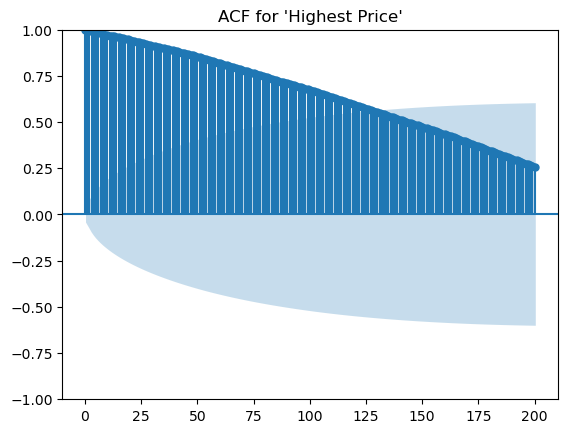

In [53]:
#Plotting of auto-correlate function for "Open" and "High"
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf

data = df2[['Open', 'High']]

# Plot ACF for 'Open'
plt.figure(figsize=(12, 6))
plot_acf(data['Open'], lags=200, title="ACF for 'Opening Price'")
plt.show()

# Plot ACF for 'High'
plt.figure(figsize=(12, 6))
plot_acf(data['High'], lags=200, title="ACF for 'Highest Price'")
plt.show()


<Figure size 1200x600 with 0 Axes>

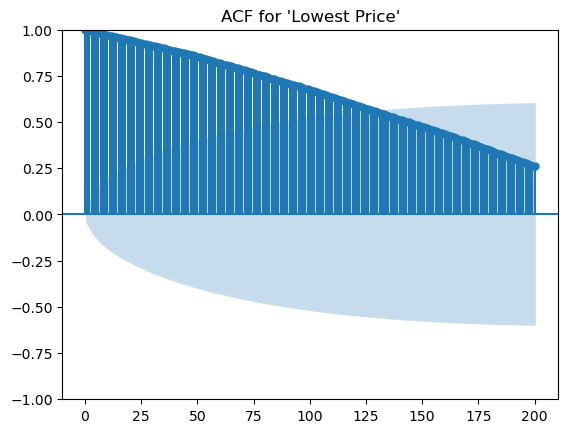

In [21]:
#Plotting auto-correlate function for "Low"
data = df2[['Low']]

# Plot ACF for 'High'
plt.figure(figsize=(12, 6))
plot_acf(data['Low'], lags=200, title="ACF for 'Lowest Price'")
plt.show()


In [36]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [37]:
data = df2[['Open', 'High']].values
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [38]:
sequence_length = 10
X, y = [], []
for i in range(len(data) - sequence_length):
    X.append(data[i:i+sequence_length, 0]) 
    y.append(data[i+sequence_length, 1])  

In [39]:
X, y = np.array(X), np.array(y)
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [61]:
#Stacked LSTM model with dropout
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(Dropout(0.35))  
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2)) 
model.add(Dense(1))


In [62]:
#Model Evaluation
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=64)
test_loss = model.evaluate(X_test, y_test)
train_loss = model.evaluate(X_test, y_test)

print(f"Testing Loss: {test_loss:.4f}")
print(f"Training Loss: {train_loss:.4f}")

Epoch 1/50
26/26 [==============================] - 5s 15ms/step - loss: 0.0413
Epoch 2/50
26/26 [==============================] - 0s 14ms/step - loss: 0.0042
Epoch 3/50
26/26 [==============================] - 0s 15ms/step - loss: 0.0024
Epoch 4/50
26/26 [==============================] - 0s 19ms/step - loss: 0.0021
Epoch 5/50
26/26 [==============================] - 0s 14ms/step - loss: 0.0022
Epoch 6/50
26/26 [==============================] - 0s 14ms/step - loss: 0.0025
Epoch 7/50
26/26 [==============================] - 0s 15ms/step - loss: 0.0021
Epoch 8/50
26/26 [==============================] - 0s 19ms/step - loss: 0.0019
Epoch 9/50
26/26 [==============================] - 0s 19ms/step - loss: 0.0018
Epoch 10/50
26/26 [==============================] - 0s 16ms/step - loss: 0.0018
Epoch 11/50
26/26 [==============================] - 0s 16ms/step - loss: 0.0018
Epoch 12/50
26/26 [==============================] - 0s 15ms/step - loss: 0.0018
Epoch 13/50
26/26 [==================

Loss for both training and testing shows that the LSTM model is performing well on data that is "has seen" and "not yet seen". The LSTM model can predict the peak prices of the trading given the opening prices.

In [46]:
data1 = df2[['Open', 'Low']].values
scaler = MinMaxScaler()
data1 = scaler.fit_transform(data1)

In [47]:
sequence_length = 10
X, y = [], []
for i in range(len(data1) - sequence_length):
    X.append(data1[i:i+sequence_length, 0]) 
    y.append(data1[i+sequence_length, 1])  

In [48]:
X, y = np.array(X), np.array(y)
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [63]:
#Stacked LSTM model with dropout
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(Dropout(0.3))  # 20% dropout rate
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))  # 20% dropout rate
model.add(Dense(1))


In [64]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=64)
test_loss = model.evaluate(X_test, y_test)
train_loss = model.evaluate(X_test, y_test)

print(f"Testing Loss: {test_loss:.4f}")
print(f"Training Loss: {train_loss:.4f}")

Epoch 1/50
26/26 [==============================] - 6s 15ms/step - loss: 0.0274
Epoch 2/50
26/26 [==============================] - 0s 14ms/step - loss: 0.0036
Epoch 3/50
26/26 [==============================] - 0s 15ms/step - loss: 0.0023
Epoch 4/50
26/26 [==============================] - 0s 14ms/step - loss: 0.0022
Epoch 5/50
26/26 [==============================] - 0s 14ms/step - loss: 0.0023
Epoch 6/50
26/26 [==============================] - 0s 14ms/step - loss: 0.0022
Epoch 7/50
26/26 [==============================] - 0s 15ms/step - loss: 0.0023
Epoch 8/50
26/26 [==============================] - 0s 14ms/step - loss: 0.0019
Epoch 9/50
26/26 [==============================] - 0s 15ms/step - loss: 0.0020
Epoch 10/50
26/26 [==============================] - 0s 15ms/step - loss: 0.0020
Epoch 11/50
26/26 [==============================] - 0s 15ms/step - loss: 0.0017
Epoch 12/50
26/26 [==============================] - 0s 15ms/step - loss: 0.0020
Epoch 13/50
26/26 [==================

Loss for both training and testing shows that the LSTM model is performing well on data that is "has seen" and "not yet seen". The LSTM model can predict the lowest prices of the trading given the opening prices.

Based on the LSTM model, the opening price can predict both the lowest price and highest price of the traidng which can be use to decide when to buy or to sell stocks, respectively.